In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from DoublePushout import DoublePushout

In [4]:
G = nx.MultiDiGraph()
G.add_edges_from([('A', 'G'), ('G', 'F'), ('F', 'G')])

L = nx.MultiDiGraph()
L.add_edges_from([('A', 'B'), ('A', 'C'), ('C', 'B')])

K = nx.MultiDiGraph()
K.add_nodes_from(['B', 'C'])

R = nx.MultiDiGraph()
R.add_edges_from([('C', 'B'), ('C', 'D'), ('C', 'E'), ('B', 'E'), ('D', 'E')])

dpo = DoublePushout(G, L, K, R)

dpo.define_morphism({'A': 'A', 'B': 'G', 'C': 'G'})

graph_G = dpo.G
graph_L = dpo.L
graph_K = dpo.K
graph_R = dpo.R

In [5]:
mL_minus_mK = dpo.calculate_mL_minus_mK()
Z = dpo.calculate_Z(mL_minus_mK)
mR_minus_mK = dpo.calculate_mR_minus_mK()
G_prime = dpo.create_G_prime(Z, mR_minus_mK)

In [34]:
dpo.morphism

{'A': 'A', 'B': 'G', 'C': 'G'}

In [ ]:
def _draw_graph(graph, ax, pos=None, highlight=None, title=""):
    if pos is None:
        pos = nx.spring_layout(graph, seed=42)  
    ax.set_title(title)
    nx.draw_networkx_nodes(graph, pos, node_color='lightgrey', node_size=500, ax=ax)
    nx.draw_networkx_labels(graph, pos, font_size=10, ax=ax)
    
    edge_count = {}
    for u, v, k in graph.edges(keys=True):
        if (u, v) not in edge_count:
            edge_count[(u, v)] = 0
        edge_count[(u, v)] += 1
        rad = 0.1 * edge_count[(u, v)]  
        nx.draw_networkx_edges(graph, pos, edgelist=[(u, v)], connectionstyle=f'arc3,rad={rad}', edge_color='grey', ax=ax)
    
    if highlight:
        edge_count = {}
        for u, v, k in highlight.edges(keys=True):
            if (u, v) not in edge_count:
                edge_count[(u, v)] = 0
            edge_count[(u, v)] += 1
            rad = 0.1 * edge_count[(u, v)] 
            nx.draw_networkx_edges(highlight, pos, edgelist=[(u, v)], connectionstyle=f'arc3,rad={rad}', edge_color='orange', ax=ax)
        nx.draw_networkx_nodes(graph, pos, nodelist=highlight.nodes, node_color='orange', node_size=500, ax=ax)

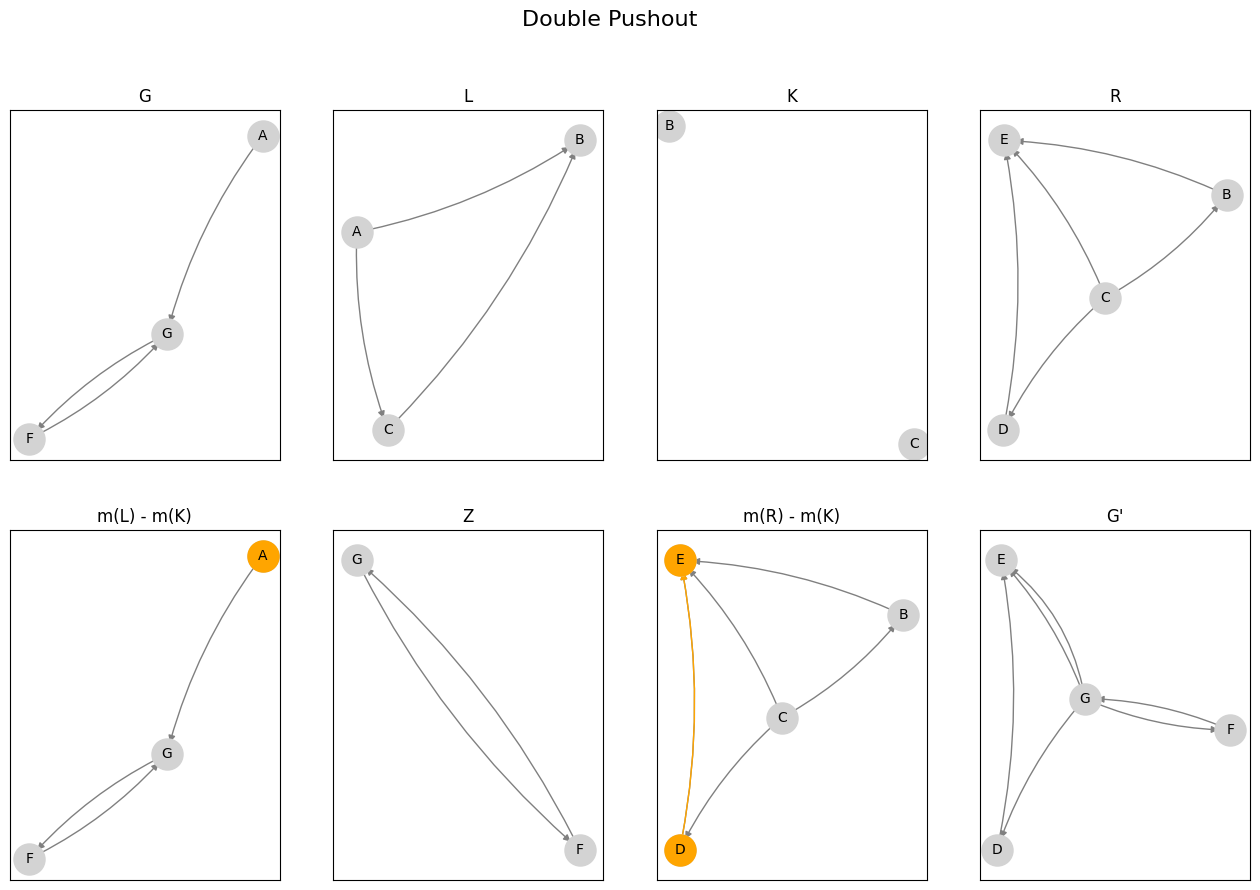

In [35]:
fig, axs = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle("Double Pushout", fontsize=16)

_draw_graph(graph_G, axs[0, 0], title="G")
_draw_graph(graph_L, axs[0, 1], title="L")
_draw_graph(graph_K, axs[0, 2], title="K")
_draw_graph(graph_R, axs[0, 3], title="R")
_draw_graph(graph_G, axs[1, 0], highlight=mL_minus_mK, title="m(L) - m(K)")
_draw_graph(Z, axs[1, 1], title="Z")
_draw_graph(R, axs[1, 2], highlight=mR_minus_mK, title="m(R) - m(K)")
_draw_graph(G_prime, axs[1, 3], title="G'")
plt.show()